In [1]:
import itertools
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Telecust.csv')
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Classification Models'

In [4]:
df['custcat'].value_counts() #Calculate the number of members for each class in custcat

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1B49D2C8>]],
      dtype=object)

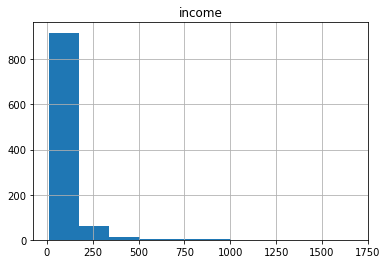

In [5]:
df.hist(column='income',bins=10)

In [6]:
df.columns #to check columns in df

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']]
x[0:5]
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [8]:
#normalizing the data
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
#train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print("Train Set :",x_train.shape,y_train.shape)
print("Test Set:",x_test.shape,y_test.shape)

Train Set : (800, 12) (800,)
Test Set: (200, 12) (200,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Algorithmn

In [10]:
k=7 # specified by the user
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [11]:
y_hat=neigh.predict(x_test)
y_hat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

In [12]:
#Accuracy Evaluation
from sklearn import metrics
print("Train Set Accuracy :",metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test Set Accuracy :",metrics.accuracy_score(y_test,y_hat))

Train Set Accuracy : 0.82625
Test Set Accuracy : 0.775


In [13]:
#Choosing Best value of K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx=[]
for n in range(1,Ks):
    #Train and testing the model
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    y_hat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

The best accuracy for the model is : 0.775 With k= 7


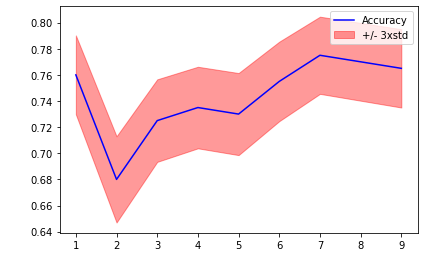

In [14]:
#plotting Output
plt.plot(range(1,Ks),mean_acc,'-b')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,color='red',alpha=0.4)
plt.xlabel("Accuracy",size=20,color='white')
plt.ylabel("No of neighbours(k)",size=20,color='white')
plt.legend(('Accuracy','+/- 3xstd'))
plt.tight_layout()
print("The best accuracy for the model is :",mean_acc.max(),"With k=",mean_acc.argmax()+1)
plt.show()